In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
s2_path='S2.pkl'
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [3]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']
pad_len=(len(c_ax)-len(w_ax))*1
pad_len_b=(len(c_ax)-len(w_bvp))*1
pad_len_e=(len(c_ax)-len(w_eda))*1
pad_len_t=(len(c_ax)-len(w_temp))*1

w_ax_= w_ax
w_ay_= w_ay
w_az_= w_az 
w_bvp_= w_bvp
w_eda_= w_eda 
w_temp_= w_temp

w_ax=np.pad(w_ax, (0,pad_len),'mean')
#k=len(w_ax)
#for m in range(k, len(c_ax)):np.append(w_ax,'')
#w_ax=np.insert(w_ax, (0,pad_len),'NaN')
w_ay=np.pad(w_ay, (0,pad_len),'mean')
w_az=np.pad(w_az, (0,pad_len),'mean')
w_bvp=np.pad(w_bvp, (0,pad_len_b),'mean')
w_eda=np.pad(w_eda, (0,pad_len_e),'mean')
w_temp=np.pad(w_temp, (0,pad_len_t),'mean')
'''

'''
import csv
from itertools import zip_longest
d = [c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_ax,w_ay,w_az,w_bvp,w_eda,w_temp,w_label]
export_data = zip_longest(*d, fillvalue = '')
with open('numbers.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("c_ax","c_ay","c_az","c_ec","c_em","c_ed","c_t","c_r","w_ax","w_ay","w_az","w_b","w_e","w_t","lb"))
      wr.writerows(export_data)
myfile.close()

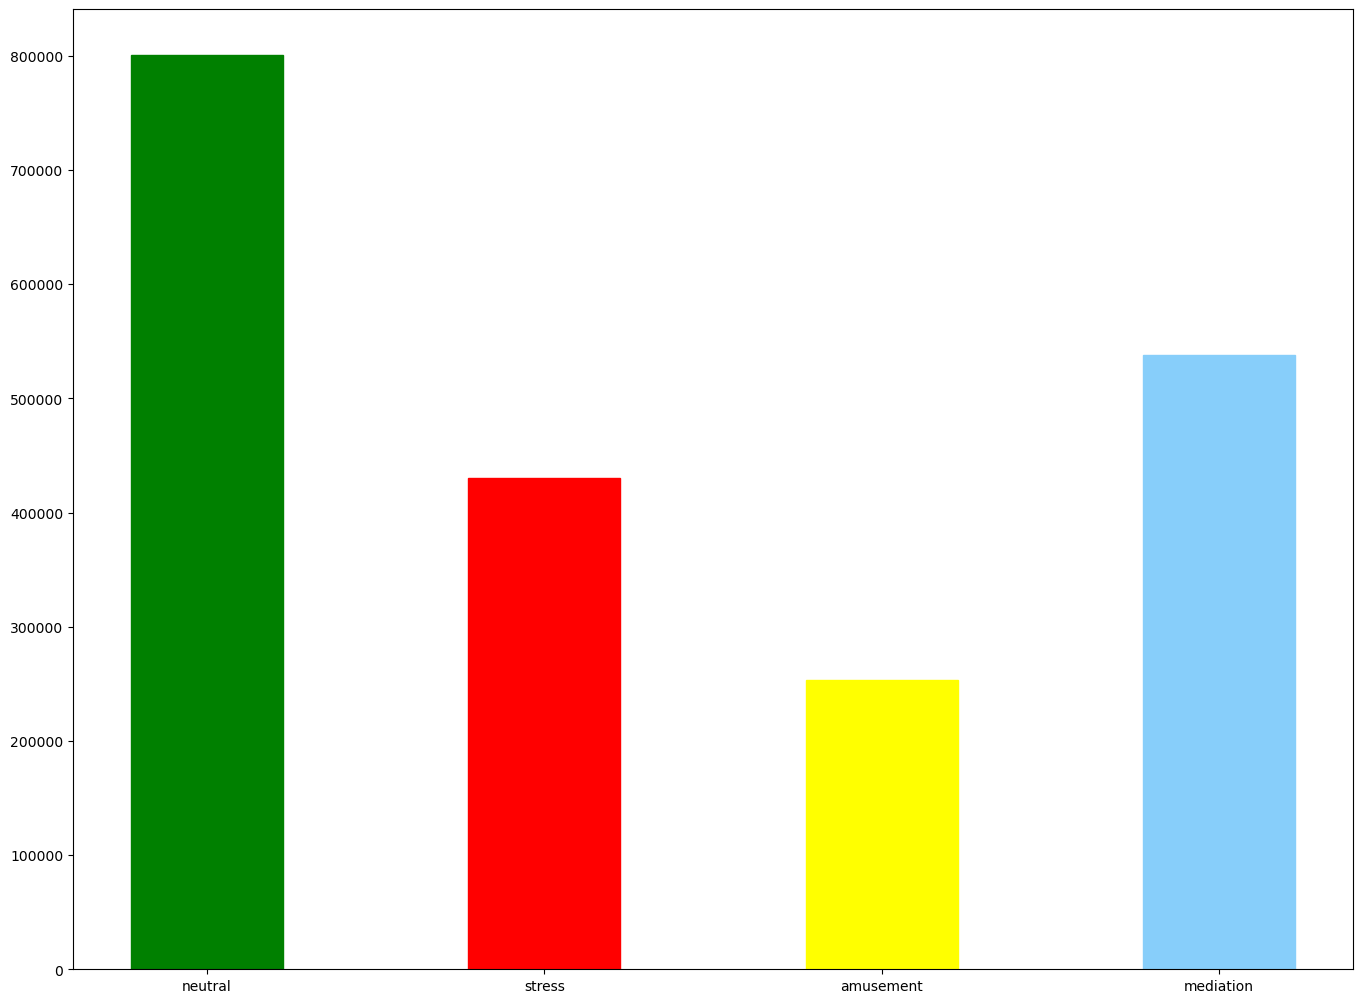

In [12]:
neutral_indices = np.nonzero(s2_data['label']==1)[0]
stress_indices = np.nonzero(s2_data['label']==2)[0]
amusement_indices = np.nonzero(s2_data['label']==3)[0]
meditation_indices = np.nonzero(s2_data['label']==4)[0]


#print("neutral_indices", len(neutral_indices))
#print("stress_indices", len(stress_indices))
#print("amusement_indices", len(amusement_indices))
#print("meditation_indices", len(meditation_indices))


fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["neutral", "stress", "amusement","mediation"]
y_ax = [len(neutral_indices),len(stress_indices),len(amusement_indices),len(meditation_indices)]
colors = ['green', 'red', 'yellow','lightskyblue']
bars=ax.bar(langs,y_ax, width = 0.45)

for bar, color in zip(bars, colors):
    bar.set_color(color)

    
fig.savefig('f1.png', dpi=100)
plt.show()



In [13]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_ax,w_ay,w_az,w_bvp,w_eda,w_temp,w_label])
numpy_data1=numpy_data1.T
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp","w_label"]) 

print("data frame combined")



data frame combined


In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)

IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_ax       0.000000
w_ay       0.000000
w_az       0.000000
w_bvp      0.000000
w_eda      0.000000
w_temp     0.000000
w_label    2.000000
dtype: float64


In [15]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2100456, 15)


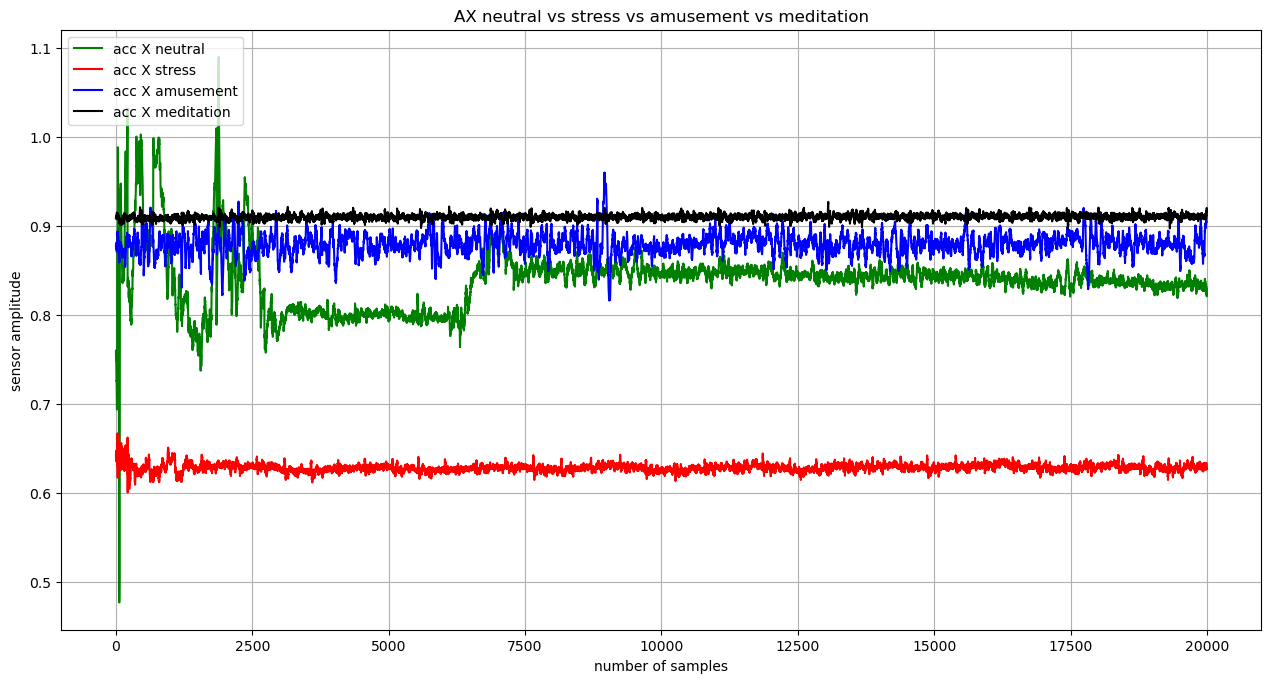

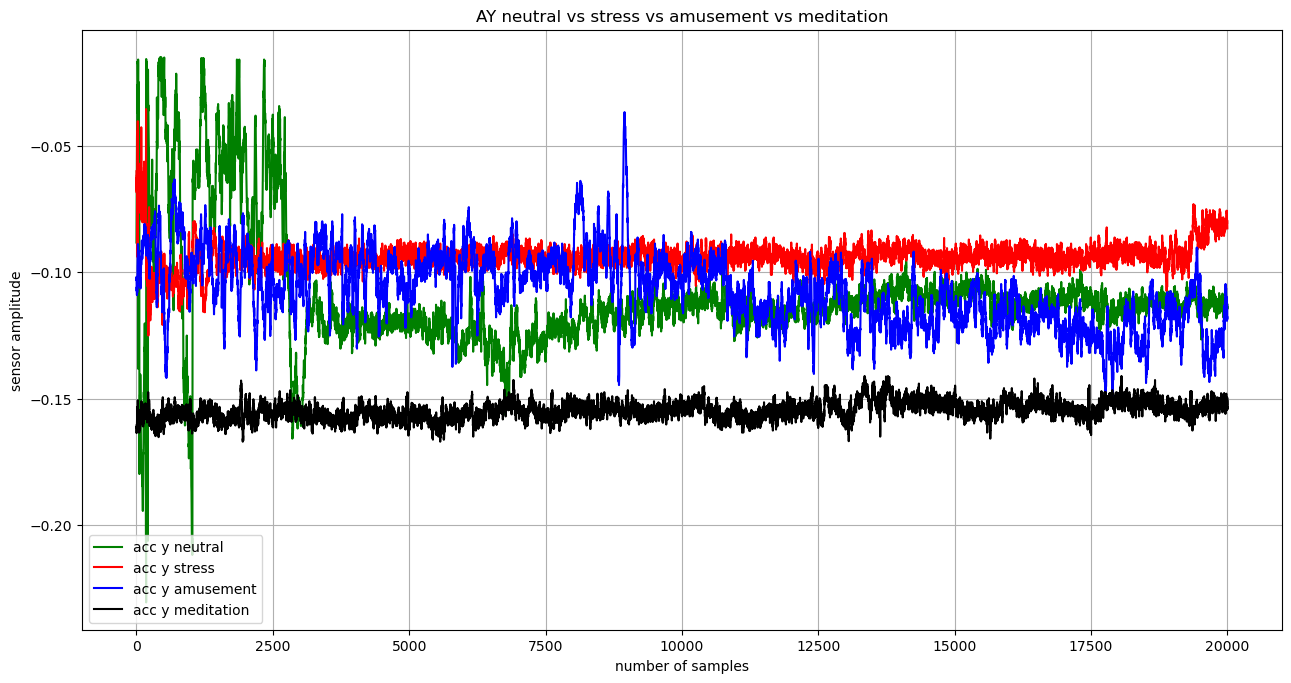

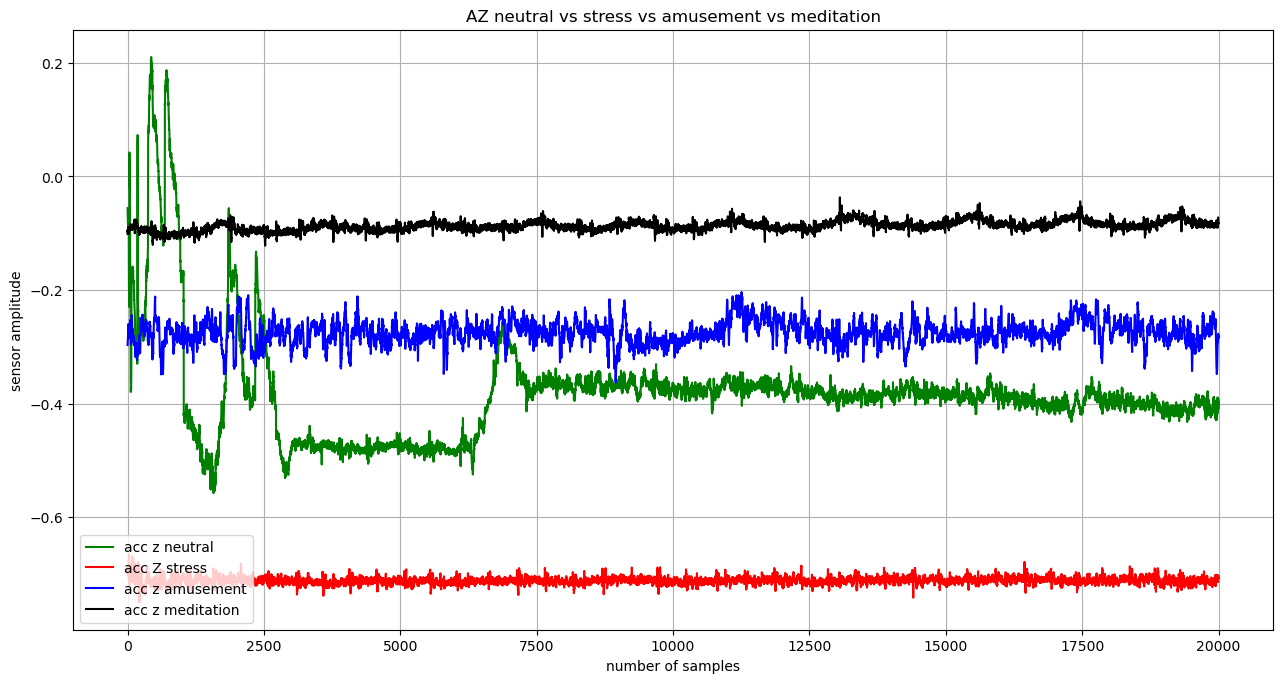

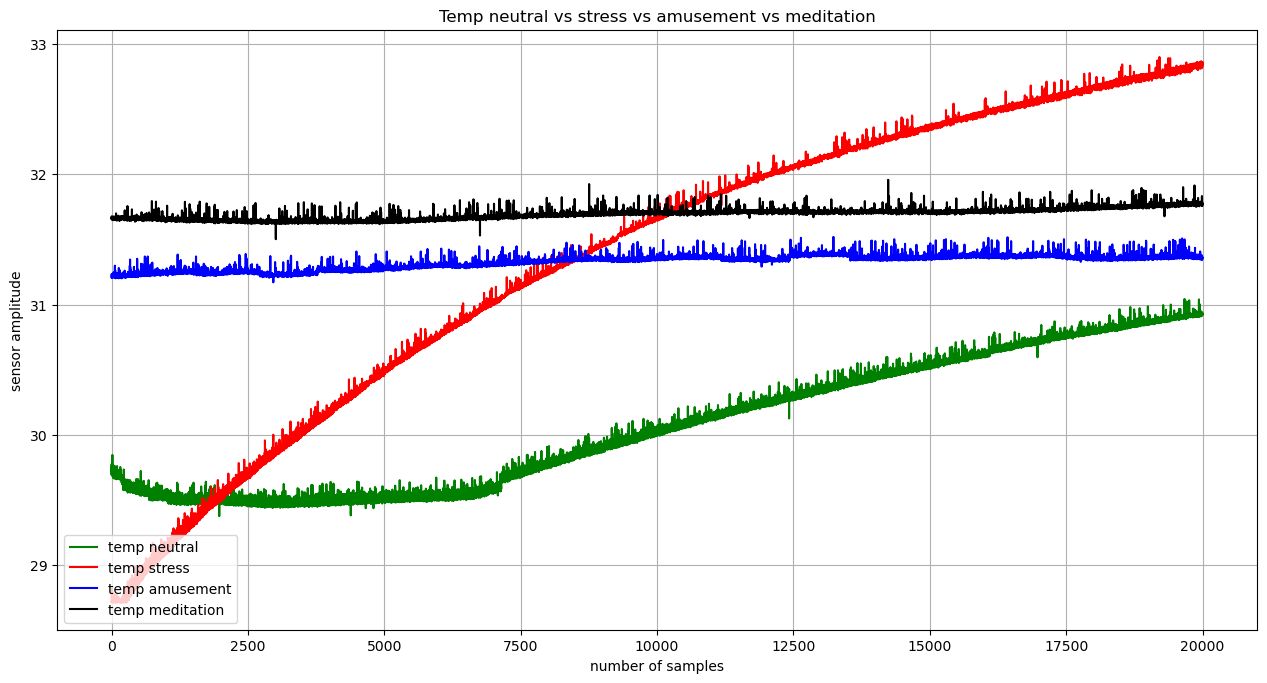

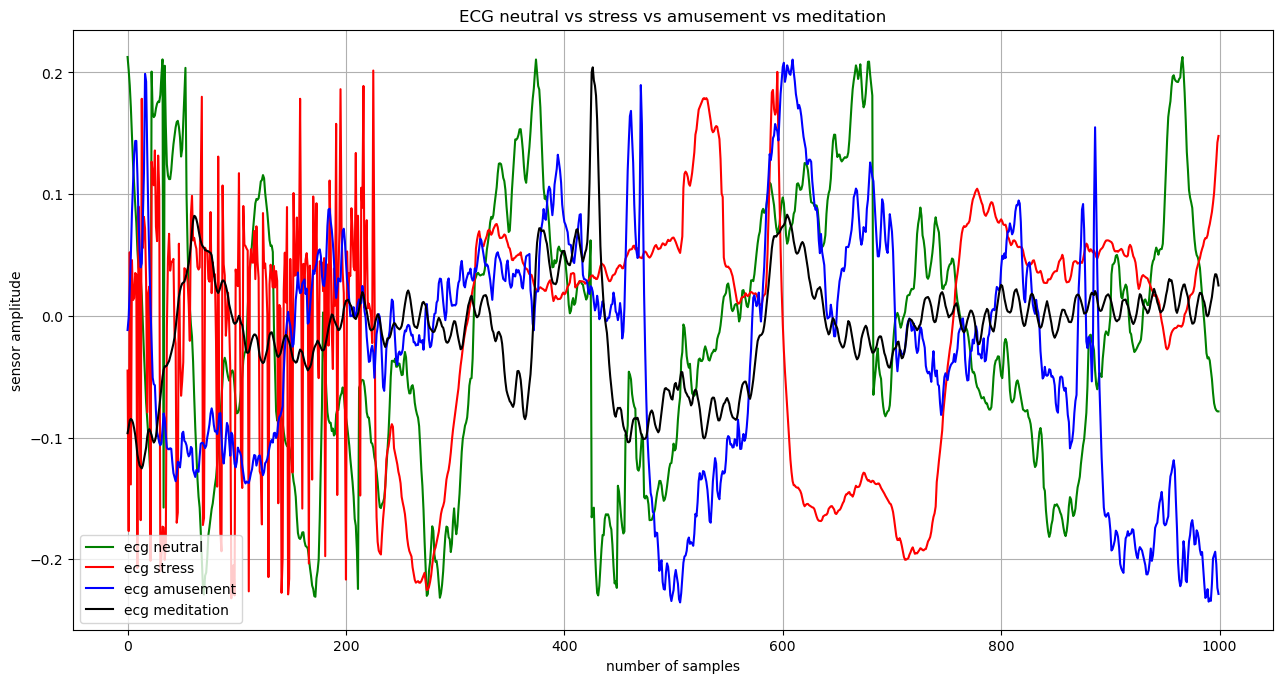

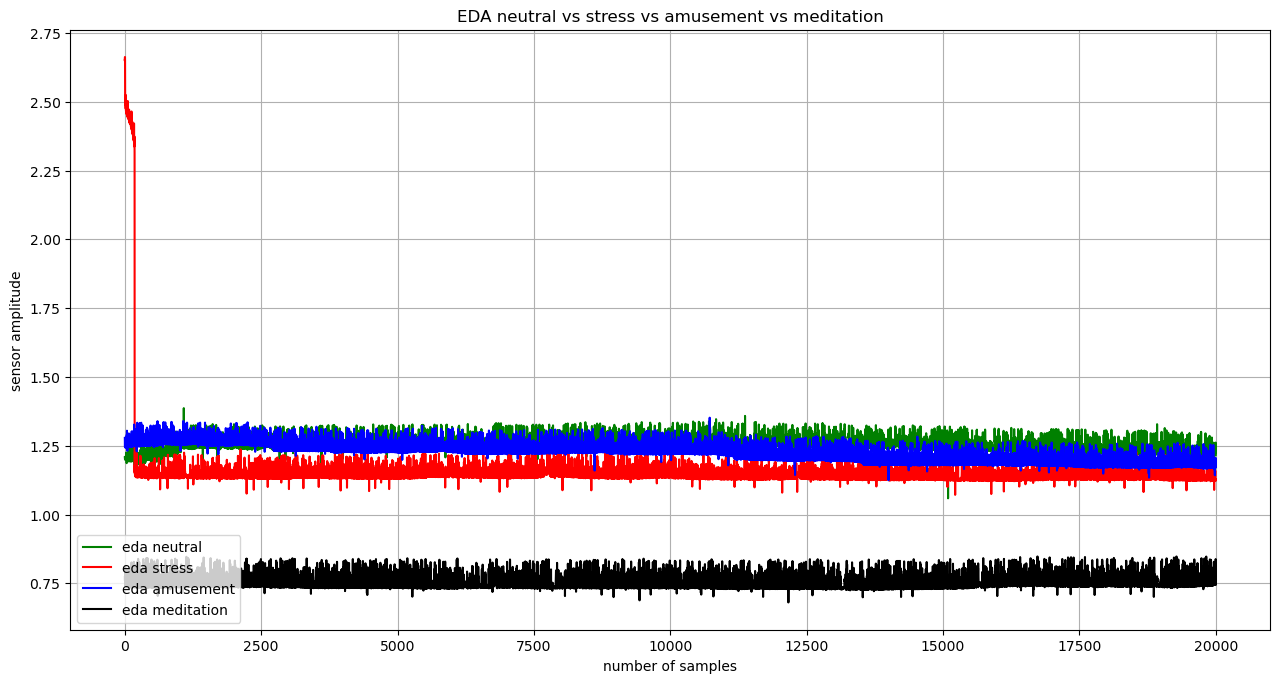

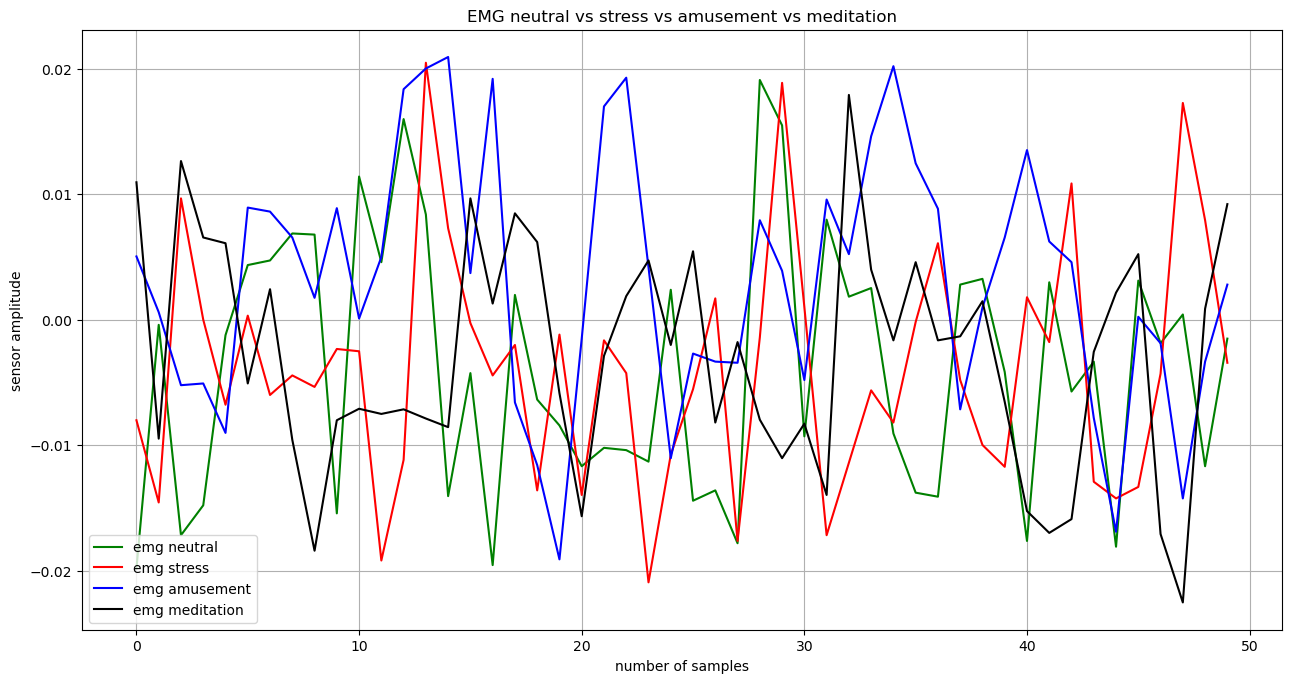

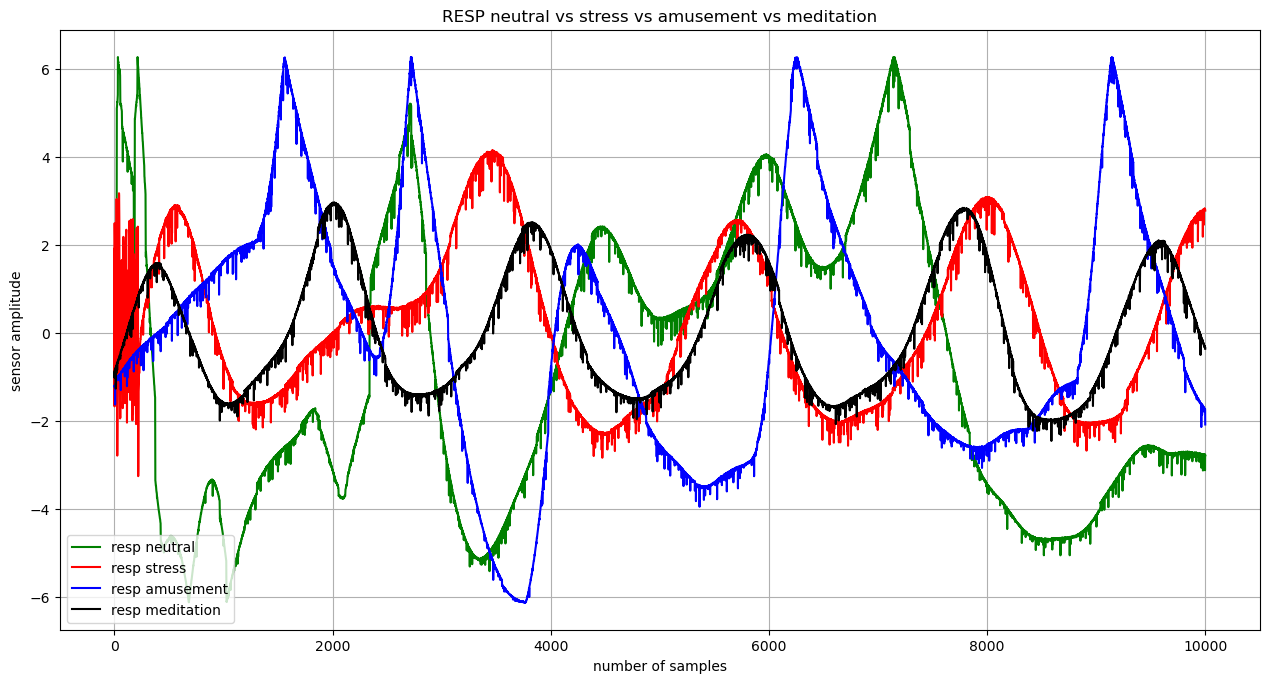

In [18]:
neutral_df = df_out.loc[(df_out['w_label'] == 0)]
stress_df = df_out.loc[(df_out['w_label'] == 1)]
amused_df = df_out.loc[(df_out['w_label'] == 2)]
medi_df = df_out.loc[(df_out['w_label'] == 3)]

y_ax=neutral_df["c_ax"][:20000].values
y_ax_s=stress_df["c_ax"][:20000].values
y_ax_a=amused_df["c_ax"][:20000].values
y_ax_m=medi_df["c_ax"][:20000].values
x_ax=np.arange(len(y_ax))


y_ay=neutral_df["c_ay"][:20000].values
y_ay_s=stress_df["c_ay"][:20000].values
y_ay_a=amused_df["c_ay"][:20000].values
y_ay_m=medi_df["c_ay"][:20000].values
x_ay=np.arange(len(y_ay))

y_az=neutral_df["c_az"][:20000].values
y_az_s=stress_df["c_az"][:20000].values
y_az_a=amused_df["c_az"][:20000].values
y_az_m=medi_df["c_az"][:20000].values
x_az=np.arange(len(y_az))

y_ecg=neutral_df["c_ecg"][:1000].values
y_ecg_s=stress_df["c_ecg"][:1000].values
y_ecg_a=amused_df["c_ecg"][:1000].values
y_ecg_m=medi_df["c_ecg"][:1000].values
x_ecg=np.arange(len(y_ecg))


y_emg=neutral_df["c_emg"][:50].values
y_emg_s=stress_df["c_emg"][:50].values
y_emg_a=amused_df["c_emg"][:50].values
y_emg_m=medi_df["c_emg"][:50].values
x_emg=np.arange(len(y_emg))

y_eda=neutral_df["c_eda"][:20000].values
y_eda_s=stress_df["c_eda"][:20000].values
y_eda_a=amused_df["c_eda"][:20000].values
y_eda_m=medi_df["c_eda"][:20000].values
x_eda=np.arange(len(y_eda))

y_temp=neutral_df["c_temp"][:20000].values
y_temp_s=stress_df["c_temp"][:20000].values
y_temp_a=amused_df["c_temp"][:20000].values
y_temp_m=medi_df["c_temp"][:20000].values
x_temp=np.arange(len(y_temp))

y_resp=neutral_df["c_resp"][:10000].values
y_resp_s=stress_df["c_resp"][:10000].values
y_resp_a=amused_df["c_resp"][:10000].values
y_resp_m=medi_df["c_resp"][:10000].values
x_resp=np.arange(len(y_resp))

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
#fig1, ax1 = plt.subplots()
ax1.plot(x_ax,y_ax,color='green',label="acc X neutral")
ax1.plot(x_ax,y_ax_s,color='red',label="acc X stress")
ax1.plot(x_ax,y_ax_a,color='blue',label="acc X amusement")
ax1.plot(x_ax,y_ax_m,color='black',label="acc X meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AX neutral vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='upper left')
fig.savefig('f2.png')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_ax,y_ay,color='green',label="acc y neutral")
ax1.plot(x_ax,y_ay_s,color='red',label="acc y stress")
ax1.plot(x_ax,y_ay_a,color='blue',label="acc y amusement")
ax1.plot(x_ax,y_ay_m,color='black',label="acc y meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AY neutral vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
fig.savefig('f3.png')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_ax,y_az,color='green',label="acc z neutral")
ax1.plot(x_ax,y_az_s,color='red',label="acc Z stress")
ax1.plot(x_ax,y_az_a,color='blue',label="acc z amusement")
ax1.plot(x_ax,y_az_m,color='black',label="acc z meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'AZ neutral vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
fig.savefig('f4.png')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_temp,y_temp,color='green',label="temp neutral")
ax1.plot(x_temp,y_temp_s,color='red',label="temp stress")
ax1.plot(x_temp,y_temp_a,color='blue',label="temp amusement")
ax1.plot(x_temp,y_temp_m,color='black',label="temp meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'Temp neutral vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
fig.savefig('f5.png')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_ecg,y_ecg,color='green',label="ecg neutral")
ax1.plot(x_ecg,y_ecg_s,color='red',label="ecg stress")
ax1.plot(x_ecg,y_ecg_a,color='blue',label="ecg amusement")
ax1.plot(x_ecg,y_ecg_m,color='black',label="ecg meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'ECG neutral vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
fig.savefig('f6.png')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_eda,y_eda,color='green',label="eda neutral")
ax1.plot(x_eda,y_eda_s,color='red',label="eda stress")
ax1.plot(x_eda,y_eda_a,color='blue',label="eda amusement")
ax1.plot(x_eda,y_eda_m,color='black',label="eda meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'EDA neutral vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
fig.savefig('f7.png')
plt.show()

#ax1 = plt.gca()
fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_emg,y_emg,color='green',label="emg neutral")
ax1.plot(x_emg,y_emg_s,color='red',label="emg stress")
ax1.plot(x_emg,y_emg_a,color='blue',label="emg amusement")
ax1.plot(x_emg,y_emg_m,color='black',label="emg meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'EMG neutral vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
fig.savefig('f8.png')
plt.show()

fig= plt.figure(figsize=(6,3))
ax1= fig.add_axes([0.1,0.1,2,2])
ax1.plot(x_resp,y_resp,color='green',label="resp neutral")
ax1.plot(x_resp,y_resp_s,color='red',label="resp stress")
ax1.plot(x_resp,y_resp_a,color='blue',label="resp amusement")
ax1.plot(x_resp,y_resp_m,color='black',label="resp meditation")
ax1.set(xlabel='number of samples', ylabel = 'sensor amplitude', title = 'RESP neutral vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
fig.savefig('f9.png')
plt.show()